# TP1 - VP1
### Andrés Merli

# Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch

In [29]:
#%matplotlib inline  

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Implementamos función con algoritmo de coordendas cromáticas

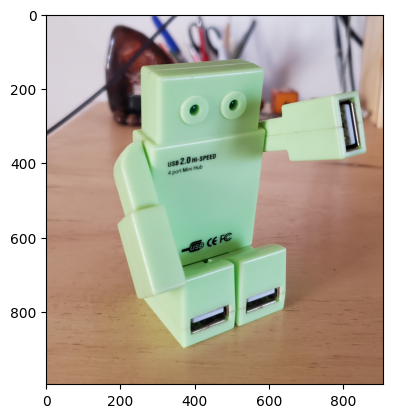

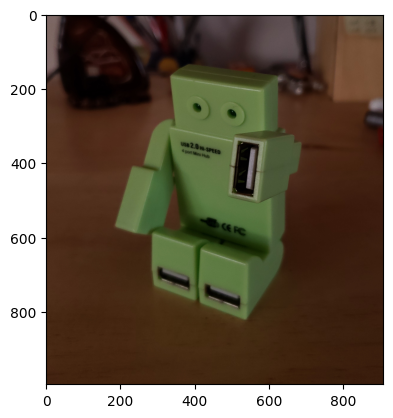

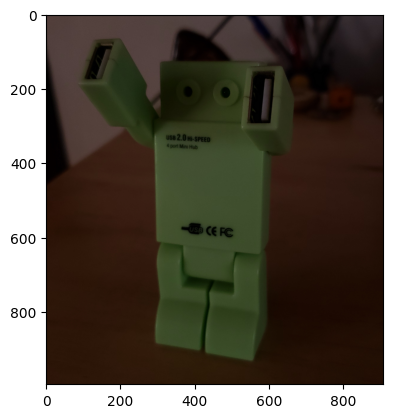

In [30]:
#Levantamos con OpenCV las 3 imagenes para aplicar Coordenadas Cromáticas y pasamos de BGR a RGB

img_cc1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img_cc1 = cv.cvtColor(img_cc1, cv.COLOR_BGR2RGB)
plt.imshow(img_cc1)
plt.show()
img_cc2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img_cc2 = cv.cvtColor(img_cc2, cv.COLOR_BGR2RGB)
plt.imshow(img_cc2)
plt.show()
img_cc3 = cv.imread('coord_cromaticas/CoordCrom_3.png')
img_cc3 = cv.cvtColor(img_cc3, cv.COLOR_BGR2RGB)
plt.imshow(img_cc3)
plt.show()

In [31]:
#definimos una función para implementar algoritmo de pasaje a coordenadas cromáticas

def coord_crom(input_image:np.ndarray) -> np.ndarray:
    """
    Toma como parámetro de entrada una imagen RGB y aplica la transformación a coordendas cromáticas, devuelve una imagen transformada
    """
    #aplicamos operaciones de numpy para evitar loops reduciendo los tiempos de ejecución
    suma_canales = input_image.sum(axis=2)
    suma_broadcasted = suma_canales[:, :, np.newaxis]
    img_coord_crom = input_image/(suma_broadcasted+0.01)
    img_ccrom_norm = np.uint8(img_coord_crom*255)
    print(img_ccrom_norm.shape)
    plt.imshow(img_ccrom_norm)
    plt.show()
    return img_ccrom_norm
    

### Aplicamos la función creada a cada una de las imagenes de la carpeta coord_cromaticas

(996, 908, 3)


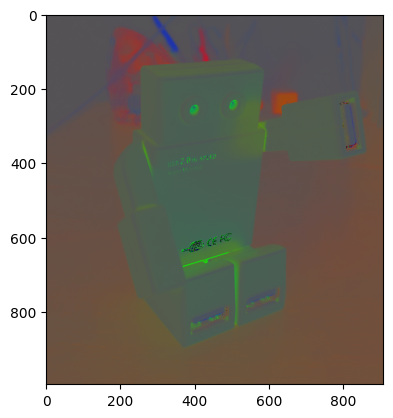

In [32]:
img_cc1_ccrom = coord_crom(img_cc1)

(996, 908, 3)


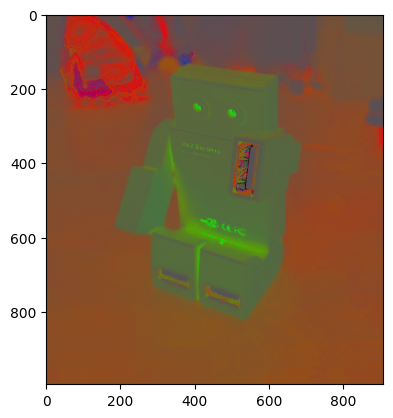

In [33]:
img_cc2_ccrom = coord_crom(img_cc2)

(996, 908, 3)


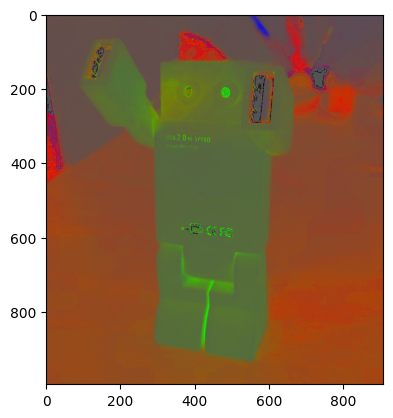

In [34]:
img_cc3_ccrom = coord_crom(img_cc3)

## White Patch

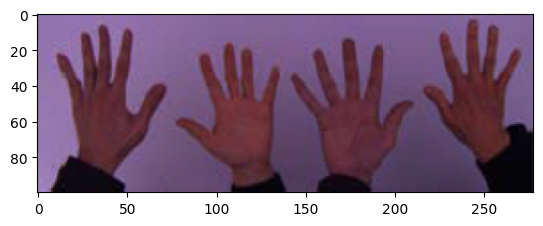

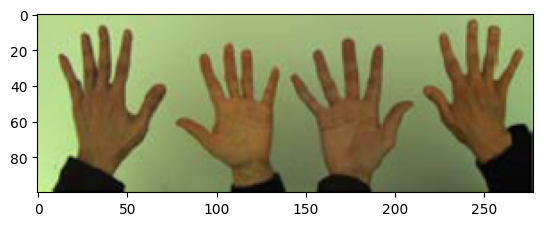

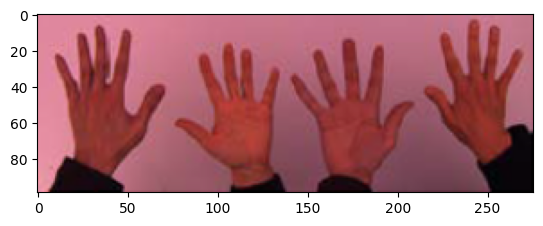

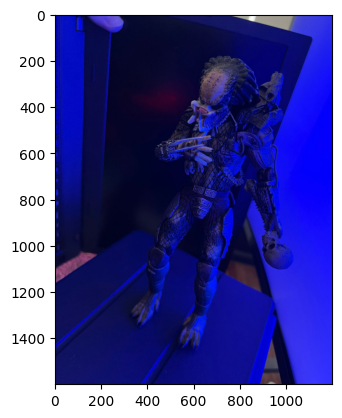

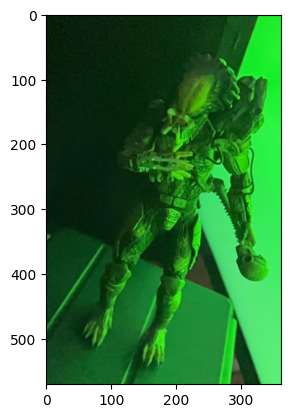

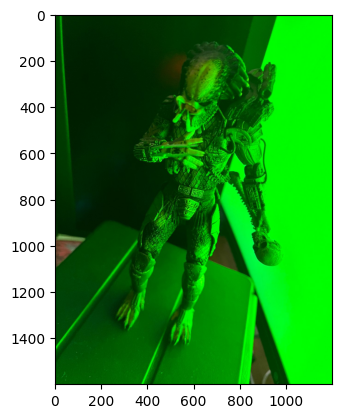

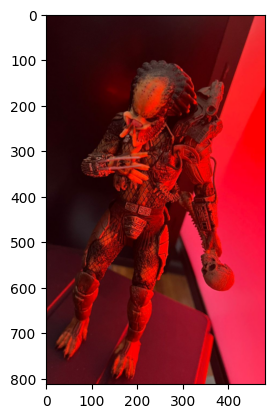

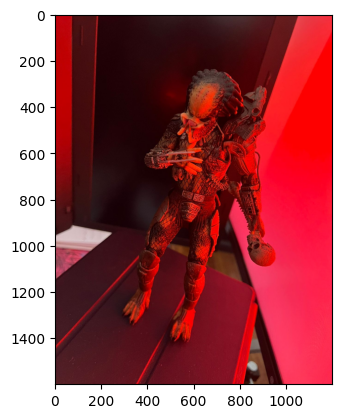

In [35]:
#Levantamos con OpenCV las 3 imagenes para aplicar White Patch y pasamos de BGR a RGB

img_wp1 = cv.imread('white_patch/test_blue.png')
img_wp1 = cv.cvtColor(img_wp1, cv.COLOR_BGR2RGB)
plt.imshow(img_wp1)
plt.show()
img_wp2 = cv.imread('white_patch/test_green.png')
img_wp2 = cv.cvtColor(img_wp2, cv.COLOR_BGR2RGB)
plt.imshow(img_wp2)
plt.show()
img_wp3 = cv.imread('white_patch/test_red.png')
img_wp3 = cv.cvtColor(img_wp3, cv.COLOR_BGR2RGB)
plt.imshow(img_wp3)
plt.show()
img_wp4 = cv.imread('white_patch/wp_blue.jpg')
img_wp4 = cv.cvtColor(img_wp4, cv.COLOR_BGR2RGB)
plt.imshow(img_wp4)
plt.show()
img_wp5 = cv.imread('white_patch/wp_green.png')
img_wp5 = cv.cvtColor(img_wp5, cv.COLOR_BGR2RGB)
plt.imshow(img_wp5)
plt.show()
img_wp6 = cv.imread('white_patch/wp_green2.jpg')
img_wp6 = cv.cvtColor(img_wp6, cv.COLOR_BGR2RGB)
plt.imshow(img_wp6)
plt.show()
img_wp7 = cv.imread('white_patch/wp_red.png')
img_wp7 = cv.cvtColor(img_wp7, cv.COLOR_BGR2RGB)
plt.imshow(img_wp7)
plt.show()
img_wp8 = cv.imread('white_patch/wp_red2.jpg')
img_wp8 = cv.cvtColor(img_wp8, cv.COLOR_BGR2RGB)
plt.imshow(img_wp8)
plt.show()


In [36]:
#definimos una función para implementar algoritmo de White Patch

def white_patch1(input_image:np.ndarray) -> np.ndarray:
    """
    Toma como parámetro de entrada una imagen RGB y aplica White Patch, devuelve una imagen transformada
    """
    #aplicamos operaciones de numpy para evitar loops reduciendo los tiempos de ejecución
    r_max = np.amax(input_image[:,:,0])
    g_max = np.amax(input_image[:,:,1])
    b_max = np.amax(input_image[:,:,2])
    print("Maximos Canales:", r_max, g_max, b_max)
    img_wp = cv.merge([np.uint8(input_image[:,:,0] * (255/r_max)), np.uint8(input_image[:,:,1] * (255/g_max)), np.uint8(input_image[:,:,2] * (255/b_max)) ])
    print(img_wp.shape)
    plt.imshow(img_wp)
    plt.show()
    
    return img_wp
    

Maximos Canales: 165 138 200
(100, 278, 3)


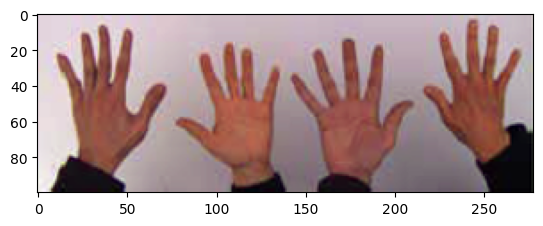

In [37]:
img_wp1_wpatch = white_patch1(img_wp1)

Maximos Canales: 210 250 171
(100, 278, 3)


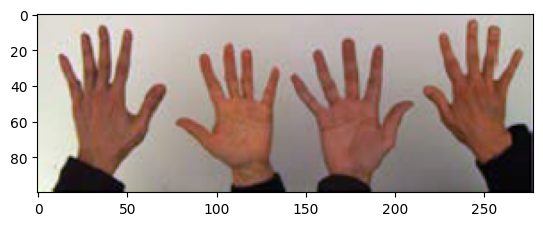

In [38]:
img_wp2_wpatch = white_patch1(img_wp2)

Maximos Canales: 247 157 175
(99, 276, 3)


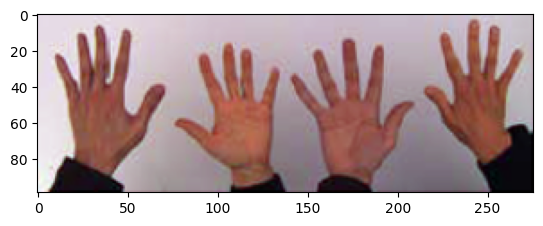

In [39]:
img_wp3_wpatch = white_patch1(img_wp3)

Hasta acá parece funcionar bastante bien!

Maximos Canales: 255 255 255
(1600, 1200, 3)


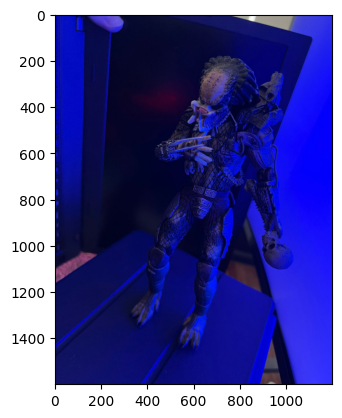

In [69]:
img_wp4_wpatch = white_patch1(img_wp4)

En este caso, parece no funcionar cuando el maximo de un canal está saturado (max = 255) es decir, sale la imagen igual que entró

Definimos un nuevo algoritmo para definir un percentil como parámetro como máximo (por ejemplo percentil >90)

(Utilizando el código que me comentaste por mail queda resumido en dos lineas) 

In [70]:
def white_patch3(input_image:np.ndarray, percentile:int) -> np.ndarray:
    """
    Toma como parámetro de entrada una imagen RGB y aplica White Patch, devuelve una imagen transformada
    """
    #aplicamos operaciones de numpy para evitar loops reduciendo los tiempos de ejecución
    #Calculamos el maximo de cada canal con el parámetro de percentil
    #Así queda resumida en dos lineas
    
    img_processed = (input_image * (255 / np.percentile(input_image, q=percentile, axis=(0, 1))))
    img_norm = cv.normalize(img_processed, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
    print(img_norm.shape)
    plt.imshow(img_norm)
    plt.show()
    
    return img_norm

(1600, 1200, 3)


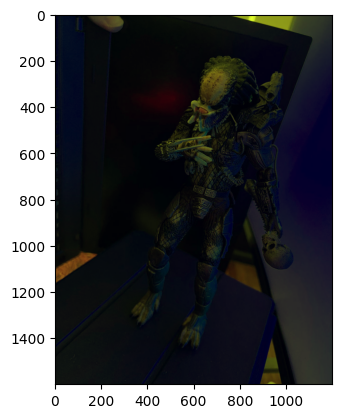

In [71]:
img_wp4_wpatch = white_patch3(img_wp4, 92)

(571, 363, 3)


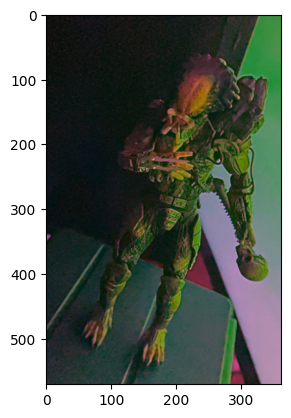

In [72]:
img_wp5_wpatch = white_patch3(img_wp5, 92)

(813, 481, 3)


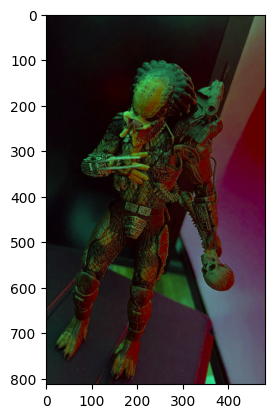

In [73]:
img_wp7_wpatch = white_patch3(img_wp7, 92)

(1600, 1200, 3)


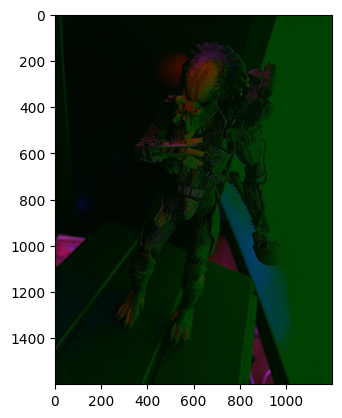

In [74]:
img_wp6_wpatch = white_patch3(img_wp6, 98)